In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#checando a base
data = pd.read_csv('C:/csv/tamanho_pinguins.csv')
data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
# removendo linhas com dados faltantes
data = data.dropna()

# excluir outliers
data = data[data.larg_bico_mm < 50]

In [5]:
#Selecionando as colunas de numeros e removendo as de textos
X, y = data.iloc[:, 2:-1], data.iloc[:, 0]

In [6]:
#escalonando numeros de 0a 1
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [7]:
x = X_[:, [0,2]]

In [8]:
#K = numero de clusters, threshhold = nivel de confiança no dado, o quão mais preciso o dado pode ser
# Função para executar o algoritmo K-means
def k_means(data, k, threshhold=2):
    
    # Número de amostras na base de dados
    n = np.size(data, 0)
    
    # Escolhe aleatoriamente k índices como centros de cluster
    cluster_centers = np.random.choice(range(0, n), k) 
    
    # Atribui aleatoriamente cada amostra a um cluster
    clustering = np.random.randint(0, k, n)
    
    # Inicializa os centros dos clusters como as amostras selecionadas aleatoriamente
    cluster_means = data[cluster_centers]
    
    # Inicializa o array de clusters antigos
    old_clustering = np.zeros(n)
    
    # Loop até que a mudança nos clusters seja menor que o limite de convergência
    while np.sum(clustering != old_clustering) > threshhold:
        old_clustering = clustering
        
        # Calcula as distâncias entre cada amostra e cada centro de cluster
        cluster_distances = np.zeros((n, k))
        for cluster in range(k):
            cluster_distances[:, cluster] = np.sum(np.sqrt((data - cluster_means[cluster])**2), 1)
        
        # Atribui cada amostra ao cluster mais próximo
        clustering = np.argmin(cluster_distances, 1)
        
        # Calcula os novos centros dos clusters como as médias das amostras em cada cluster
        cluster_means = np.array([np.mean(data[clustering==c], 0) for c in range(k)])
    
    # Retorna os centros dos clusters e a atribuição de cada amostra ao cluster mais próximo
    return cluster_means, clustering

In [9]:
# Chama a função k_means para encontrar os centros dos clusters e as etiquetas de cluster
centers, labels = k_means(x, 3)

In [10]:
# Resultado de classificação dos clusters
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

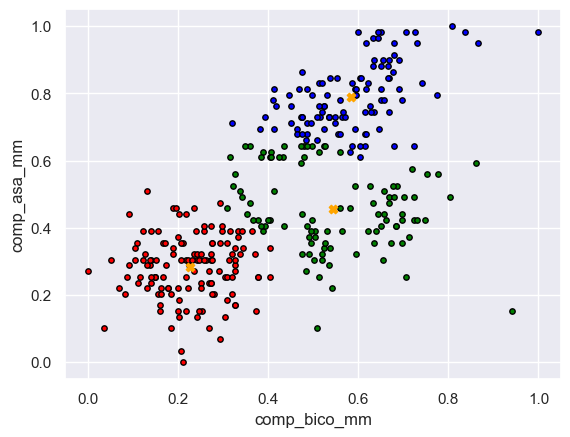

In [11]:
#dividiu em 3 grupos, centros são marcados com a cor laranja
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], color="blue", edgecolors='black', s=15)
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], color="green", edgecolors='black', s=15)
plt.scatter(centers[:,0], centers[:,1], color='orange', marker='X')
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

In [10]:
#Implementando K-medoids
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [11]:
#checando base
data = pd.read_csv('C:/csv/tamanho_pinguins.csv')
data.head()

,especie,ilha,comp_bico_mm,larg_bico_mm,comp_asa_mm,peso_gr,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
# Retirando valores faltantes
data = data.dropna()

# Xxcluir outliers
data = data[data.larg_bico_mm < 50]

In [13]:
X, y = data.iloc[:, 2:-1], data.iloc[:, 0]

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)
X_

array([[0.25454545, 0.66666667, 0.15254237, 0.29166667],
       [0.26909091, 0.51190476, 0.23728814, 0.30555556],
       [0.29818182, 0.58333333, 0.38983051, 0.15277778],
       ...,
       [0.66545455, 0.30952381, 0.84745763, 0.84722222],
       [0.47636364, 0.20238095, 0.6779661 , 0.69444444],
       [0.64727273, 0.35714286, 0.69491525, 0.75      ]])

In [14]:
#pegando só 2 colunas pra checar em apneas 2 dimensões
x = X_[:, [0,2]]

In [16]:
# Função para executar o algoritmo K-medoids
def k_medoids(data, k, threshhold=2):
    
    # Número de amostras na base de dados
    n = np.size(data, 0)
    
    # Escolhe aleatoriamente k índices como medoids iniciais
    cluster_centers = np.random.choice(range(0, n), k)
    
    # Atribui aleatoriamente cada amostra a um cluster
    clustering = np.random.randint(0, k, n)
    
    # Inicializa os medoids como as amostras selecionadas aleatoriamente
    cluster_means = data[cluster_centers]
    
    # Inicializa o array de clusters antigos
    old_clustering = np.zeros(n)
    
    # Loop até que a mudança nos clusters seja menor que o limite de convergência
    while np.sum(clustering != old_clustering) > threshhold:
        old_clustering = clustering
        
        # Calcula as distâncias entre cada amostra e cada medoid
        cluster_distances = np.zeros((n, k))
        for cluster in range(k):
            cluster_distances[:, cluster] = np.sum(np.sqrt((data - cluster_means[cluster])**2), 1)
        
        # Atribui cada amostra ao medoid mais próximo
        clustering = np.argmin(cluster_distances, 1)
        
        # Calcula os novos medoids como as amostras mais próximas dos centróides de cada cluster
        temp_cluster_means = np.array([np.mean(data[clustering==c], 0) for c in range(k)])
        
        cluster_means = []
        for ncluster in range(k):
            # Calcula as distâncias entre cada amostra no cluster e o centróide do cluster
            distances_means = np.sum(np.sqrt((data[clustering == ncluster] - temp_cluster_means[ncluster])**2), 1)
            # Seleciona a amostra mais próxima do centróide como o novo medoid
            cluster_means.append(list(data[clustering == ncluster][np.argmin(distances_means)]))
    
    # Retorna os medoids e a atribuição de cada amostra ao cluster mais próximo
    return np.array(cluster_means), clustering

In [17]:
# Chama a função k_medoids para encontrar os centros dos clusters e as etiquetas de cluster
centers, labels = k_medoids(x, 3)

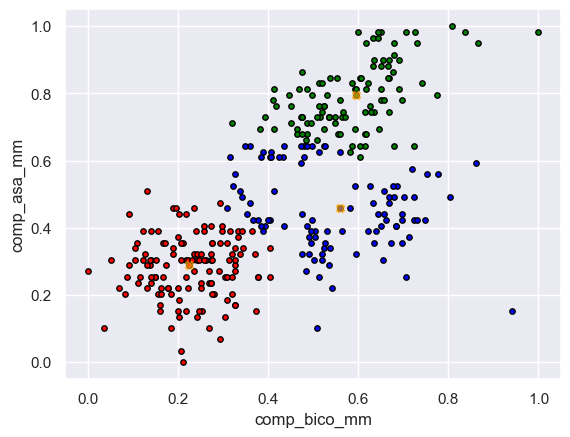

In [18]:
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], color="blue", edgecolors='black', s=15)
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], color="red", edgecolors='black', s=15)
plt.scatter(x[labels == 2, 0], x[labels == 2, 1], color="green", edgecolors='black', s=15)
plt.scatter(centers[:,0], centers[:,1], color='orange', marker='X', alpha=.6)
plt.xlabel('comp_bico_mm')
plt.ylabel('comp_asa_mm');

In [19]:
#clusterização PArticional na Prática
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [21]:
#checando base
df = pd.read_csv('c:/csv/paises_do_mundo.csv')
df.dropna(inplace=True)#removendo linhas com valores faltantes
df.head()

,pais,regiao,populacao,area,densidade_populacional,costa,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao,telefones,pec_aravel,perc_plantacao,perc_outras,clima,taxa_nascimento,taxa_mortalidade,agricultura,industria,servicos
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [22]:
X = df.iloc[:, 4:10].copy()#pegando valores numeros da coluna 4 a 10
X

,densidade_populacional,costa,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao
0,48.0,0.00,23.06,163.07,700.0,36.0
1,124.6,1.26,-4.93,21.52,4500.0,86.5
2,13.8,0.04,-0.39,31.00,6000.0,70.0
6,132.1,59.80,10.76,21.03,8600.0,95.0
7,156.0,34.54,-6.15,19.46,11000.0,89.0
...,...,...,...,...,...,...
218,28.2,0.31,-0.04,22.20,4800.0,93.4
219,256.1,1.05,-0.45,25.95,2500.0,90.3
224,40.6,0.36,0.00,61.50,800.0,50.2
225,15.3,0.00,0.00,88.29,800.0,80.6


In [23]:
X.drop('costa', axis=1, inplace=True)#removendo coluna costa

In [24]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

In [25]:
from sklearn.cluster import KMeans #importando algoritmos
from sklearn.decomposition import PCA

In [26]:
#visualização em 2d
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_)

print(pca.explained_variance_ratio_)

[0.68280947 0.18073361]


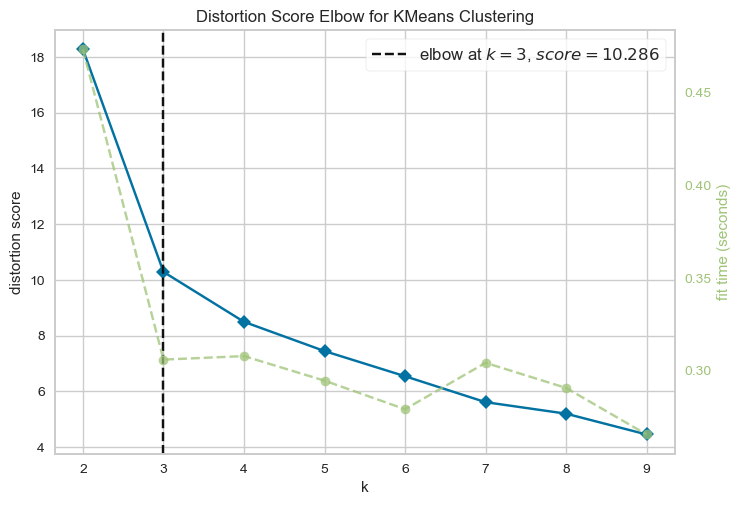

In [27]:
#encontrar o numero ideal de casos
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10),metric='distortion', timings= True)
visualizer.fit(X_) 
visualizer.show(); 
#numero ideal de 3

In [28]:
#o numero ideal é 3

#mas dá pra testar com outros valores, no caso a seguir é 5
k=5
kmeans = KMeans(n_clusters=k, random_state=3, n_init="auto").fit(X_)
labels = kmeans.labels_

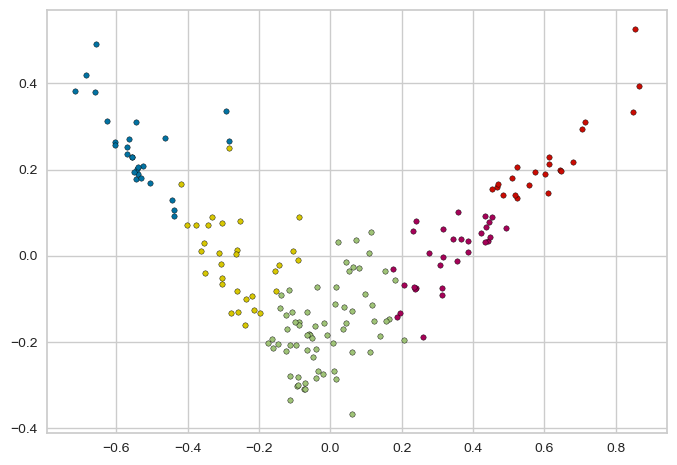

In [29]:
for n in range(k):
    plt.scatter(pca_features[labels == n, 0], pca_features[labels == n, 1], edgecolors='black', s=15)
plt.plot();
   
 #visualizando a divisão dos paises   

In [30]:
# metrica pra ver quais informações o k-means utilizou pra separação
X['cluster'] = labels
X.groupby(by='cluster').mean()

,densidade_populacional,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao
cluster,,,,,
0,662.822222,3.779259,5.646667,28522.222222,96.900000
1,121.042647,-2.973529,29.435147,4988.235294,89.666176
2,95.513636,0.950455,98.035455,1227.272727,41.172727
3,94.235484,-0.316774,74.379032,1800.000000,69.000000
4,697.432258,1.680645,11.167419,14238.709677,93.858065


In [31]:
X

,densidade_populacional,imigracao,mortalidade_infantil,pib_per_capta,perc_alfabetizacao,cluster
0,48.0,23.06,163.07,700.0,36.0,2
1,124.6,-4.93,21.52,4500.0,86.5,1
2,13.8,-0.39,31.00,6000.0,70.0,1
6,132.1,10.76,21.03,8600.0,95.0,4
7,156.0,-6.15,19.46,11000.0,89.0,1
...,...,...,...,...,...,...
218,28.2,-0.04,22.20,4800.0,93.4,1
219,256.1,-0.45,25.95,2500.0,90.3,1
224,40.6,0.00,61.50,800.0,50.2,3
225,15.3,0.00,88.29,800.0,80.6,3


In [32]:
#definindo o valor de labels na tabela
df['cluster'] = labels

In [33]:
#checando qual label representa qual região e quantas regiões há em cada label
df.groupby(['cluster', 'regiao'])['regiao'].count()

cluster  regiao                             
0        ASIA (EX. NEAR EAST)                    4
         LATIN AMER. & CARIB                     2
         NEAR EAST                               2
         NORTHERN AMERICA                        2
         OCEANIA                                 2
         WESTERN EUROPE                         15
1        ASIA (EX. NEAR EAST)                   11
         C.W. OF IND. STATES                     9
         EASTERN EUROPE                          3
         LATIN AMER. & CARIB                    27
         NEAR EAST                               3
         NORTHERN AFRICA                         2
         OCEANIA                                 5
         SUB-SAHARAN AFRICA                      8
2        ASIA (EX. NEAR EAST)                    4
         NEAR EAST                               1
         SUB-SAHARAN AFRICA                     17
3        ASIA (EX. NEAR EAST)                    4
         C.W. OF IND. STATES         

In [34]:
#contando apenas regiões
df['regiao'].value_counts()

regiao
SUB-SAHARAN AFRICA                     47
LATIN AMER. & CARIB                    42
ASIA (EX. NEAR EAST)                   26
WESTERN EUROPE                         17
OCEANIA                                12
NEAR EAST                              12
C.W. OF IND. STATES                    10
EASTERN EUROPE                          6
NORTHERN AFRICA                         3
NORTHERN AMERICA                        2
BALTICS                                 2
Name: count, dtype: int64